# Data Preprocessing

### .arff to .csv and column name addition

In [1]:
TRAIN_20 = r"C:\Users\KIIT\Desktop\SEM-VII\Major Project\NSL-KDD\Original\KDDTrain+_20Percent.arff"

In [42]:
TEST = r"C:\Users\KIIT\Desktop\SEM-VII\Major Project\NSL-KDD\Original\KDDTest+.arff"
TRAIN = r"C:\Users\KIIT\Desktop\SEM-VII\Major Project\NSL-KDD\Original\KDDTrain20+.arff"

In [2]:
import pandas as pd

def arff_to_csv(arff_file, csv_file, column_names):
    with open(arff_file, 'r') as arff:
        data = arff.readlines()

    # Finding the data section start line
    for i, line in enumerate(data):
        if line.strip().lower() == '@data':
            break

    # Reading the data starting from the data section
    df = pd.read_csv(arff_file, skiprows=i + 1, names=column_names)

    # Save as CSV
    df.to_csv(csv_file, index=False)

if __name__ == "__main__":
    # Replace 'input.arff' with the path to your ARFF file
    # Replace 'output.csv' with the desired path for the output CSV file
    # Replace the column_names list with your custom column names
    column_names = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome','level'])  # Replace with your column names
    arff_to_csv(TRAIN_20, r"C:\Users\KIIT\Desktop\SEM-VII\Major Project\NSL-KDD\KDDTrain20+.csv", column_names)


### Label Mapping

In [8]:
import pandas as pd

def unique_strings_to_dict(input_file, column_names):
    df = pd.read_csv(input_file)

    unique_dicts = {}
    for column_name in column_names:
        # Extract unique values from the specified column
        unique_values = df[column_name].unique()

        # Create a dictionary with keys as unique strings and values as their corresponding indices
        unique_dict = {string: idx for idx, string in enumerate(unique_values)}
        unique_dicts[column_name] = unique_dict

    return unique_dicts

def label_map_outcome(input_file, output_file, column_mapping):
    df = pd.read_csv(input_file)

    for column_name, mapping_dict in column_mapping.items():
        # Map the specified column using the provided mapping dictionary
        df[column_name] = df[column_name].map(mapping_dict)

    df.to_csv(output_file, index=False)

if __name__ == "__main__":
    # Replace 'data' with a list of input file paths containing multiple datasets.
    input_file_paths = [Test_20]
    column_names_list = ['service','protocol_type','flag','outcome']

#     # Replace 'output_paths' with a list of output file paths for each dataset.
#     output_paths = [r'C:\Users\KIIT\Desktop\SEM-VII\Major Project\NSL-KDD\label_test.csv', 
#                     r'C:\Users\KIIT\Desktop\SEM-VII\Major Project\NSL-KDD\label_train.csv']
    output_paths = [r'C:\Users\KIIT\Desktop\SEM-VII\Major Project\NSL-KDD\label_test20.csv']


    # Generate the mapping dictionary for the first dataset
    result_dicts = {'service': {'private': 0, 'ftp_data': 1, 'eco_i': 2, 'telnet': 3, 'http': 4, 'smtp': 5, 'ftp': 6, 'ldap': 7, 'pop_3': 8, 'courier': 9, 'discard': 10, 'ecr_i': 11, 'imap4': 12, 'domain_u': 13, 'mtp': 14, 'systat': 15, 'iso_tsap': 16, 'other': 17, 'csnet_ns': 18, 'finger': 19, 'uucp': 20, 'whois': 21, 'netbios_ns': 22, 'link': 23, 'Z39_50': 24, 'sunrpc': 25, 'auth': 26, 'netbios_dgm': 27, 'uucp_path': 28, 'vmnet': 29, 'domain': 30, 'name': 31, 'pop_2': 32, 'http_443': 33, 'urp_i': 34, 'login': 35, 'gopher': 36, 'exec': 37, 'time': 38, 'remote_job': 39, 'ssh': 40, 'kshell': 41, 'sql_net': 42, 'shell': 43, 'hostnames': 44, 'echo': 45, 'daytime': 46, 'pm_dump': 47, 'IRC': 48, 'netstat': 49, 'ctf': 50, 'nntp': 51, 'netbios_ssn': 52, 'tim_i': 53, 'supdup': 54, 'bgp': 55, 'nnsp': 56, 'rje': 57, 'printer': 58, 'efs': 59, 'X11': 60, 'ntp_u': 61, 'klogin': 62, 'tftp_u': 63}, 'protocol_type': {'tcp': 0, 'icmp': 1, 'udp': 2}, 'flag': {'REJ': 0, 'SF': 1, 'RSTO': 2, 'S0': 3, 'RSTR': 4, 'SH': 5, 'S3': 6, 'S2': 7, 'S1': 8, 'RSTOS0': 9, 'OTH': 10}, 'outcome': {'anomaly': 0, 'normal': 1}}
    print(result_dicts)

    for input_file_path, output_file_path in zip(input_file_paths, output_paths):
        # Use the same mapping dictionary for each dataset
        column_mapping = result_dicts
        label_map_outcome(input_file_path, output_file_path, column_mapping)



{'service': {'private': 0, 'ftp_data': 1, 'eco_i': 2, 'telnet': 3, 'http': 4, 'smtp': 5, 'ftp': 6, 'ldap': 7, 'pop_3': 8, 'courier': 9, 'discard': 10, 'ecr_i': 11, 'imap4': 12, 'domain_u': 13, 'mtp': 14, 'systat': 15, 'iso_tsap': 16, 'other': 17, 'csnet_ns': 18, 'finger': 19, 'uucp': 20, 'whois': 21, 'netbios_ns': 22, 'link': 23, 'Z39_50': 24, 'sunrpc': 25, 'auth': 26, 'netbios_dgm': 27, 'uucp_path': 28, 'vmnet': 29, 'domain': 30, 'name': 31, 'pop_2': 32, 'http_443': 33, 'urp_i': 34, 'login': 35, 'gopher': 36, 'exec': 37, 'time': 38, 'remote_job': 39, 'ssh': 40, 'kshell': 41, 'sql_net': 42, 'shell': 43, 'hostnames': 44, 'echo': 45, 'daytime': 46, 'pm_dump': 47, 'IRC': 48, 'netstat': 49, 'ctf': 50, 'nntp': 51, 'netbios_ssn': 52, 'tim_i': 53, 'supdup': 54, 'bgp': 55, 'nnsp': 56, 'rje': 57, 'printer': 58, 'efs': 59, 'X11': 60, 'ntp_u': 61, 'klogin': 62, 'tftp_u': 63}, 'protocol_type': {'tcp': 0, 'icmp': 1, 'udp': 2}, 'flag': {'REJ': 0, 'SF': 1, 'RSTO': 2, 'S0': 3, 'RSTR': 4, 'SH': 5, 'S3'

In [2]:
TEST = r'C:\Users\KIIT\Desktop\SEM-VII\Major Project\NSL-KDD\label_test.csv'
TRAIN = r'C:\Users\KIIT\Desktop\SEM-VII\Major Project\NSL-KDD\label_train.csv'
DATA = r"C:\Users\KIIT\Desktop\SEM-VII\Major Project\NSL-KDD\final_combined.csv"

In [18]:
MODEL_GB = r"C:\Users\KIIT\Desktop\SEM-VII\Major Project\NSL-KDD\MODEL\GB.pkl"
MODEL_RF = r"C:\Users\KIIT\Desktop\SEM-VII\Major Project\NSL-KDD\MODEL\RF.pkl"
MODEL_DT = r"C:\Users\KIIT\Desktop\SEM-VII\Major Project\NSL-KDD\MODEL\DT.pkl"
MODEL_ET = r"C:\Users\KIIT\Desktop\SEM-VII\Major Project\NSL-KDD\MODEL\ET.pkl"
MODEL_AdaB = r"C:\Users\KIIT\Desktop\SEM-VII\Major Project\NSL-KDD\MODEL\AdaB.pkl"
MODEL_NN = r"C:\Users\KIIT\Desktop\SEM-VII\Major Project\NSL-KDD\MODEL\NN.pkl"

### Gradient Boosting

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss, confusion_matrix

# Step 1: Load the dataset
file_path = DATA
df = pd.read_csv(file_path)

# Step 2: Prepare the data
X = df.drop('outcome', axis=1)
y = df['outcome']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create and train the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = gb_model.predict(X_test)

# Step 6: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

## logloss and auc
auc = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, gb_model.predict_proba(X_test))
print("AUC: {:.4f}".format(auc))
print("Log Loss: {:.4f}".format(logloss))

# Step 7: Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


# import joblib
# # Save the trained classifier model to a file
# model_filename = MODEL_GB
# joblib.dump(gb_model, model_filename)


Accuracy: 0.987947751144627
AUC: 0.9879
Log Loss: 0.0502
Confusion Matrix:
[[15281   169]
 [  189 14065]]


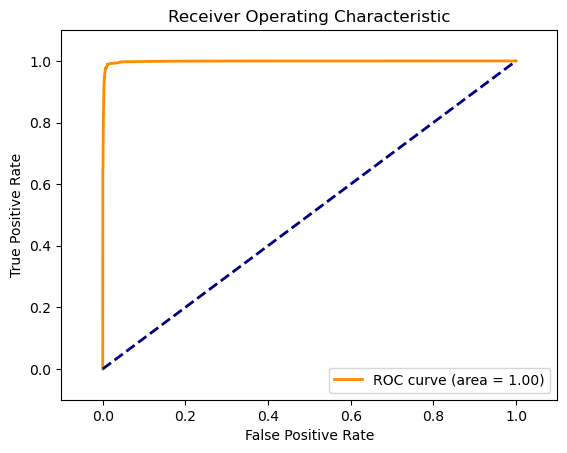

In [4]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, gb_model.predict_proba(X_test)[:,1])
roc_auc_value = auc(fpr, tpr)  # Renamed the variable to avoid naming conflict

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_value))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Random Forest

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss, confusion_matrix

# Step 1: Load the dataset
file_path = DATA
df = pd.read_csv(file_path)

# Step 2: Prepare the data
X = df.drop('outcome', axis=1)
y = df['outcome']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 5: Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Step 6: Evaluate the model's performance on the test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Step 7: Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

## logloss and auc
auc = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, rf_model.predict_proba(X_test))
print("AUC: {:.4f}".format(auc))
print("Log Loss: {:.4f}".format(logloss))

import joblib
# Save the trained classifier model to a file
model_filename = MODEL_RF
joblib.dump(rf_model, model_filename)


Accuracy: 0.9956571505521142
Confusion Matrix:
[[15406    44]
 [   85 14169]]
AUC: 0.9956
Log Loss: 0.0171


NameError: name 'MODEL_RF' is not defined

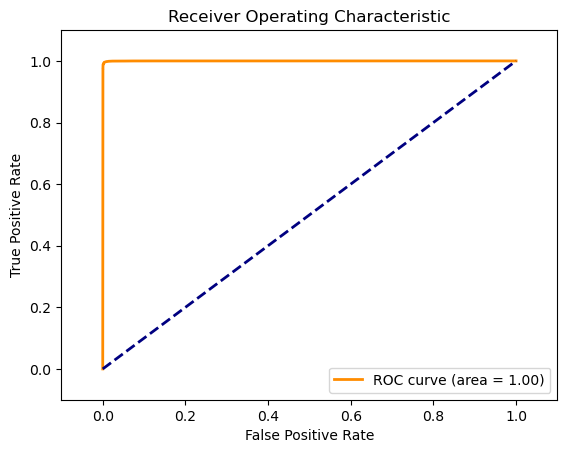

In [6]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
roc_auc_value = auc(fpr, tpr)  # Renamed the variable to avoid naming conflict

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_value))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Decision Tree

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss, confusion_matrix

# Step 1: Load the dataset
file_path = DATA
df = pd.read_csv(file_path)

# Step 2: Prepare the data
X = df.drop('outcome', axis=1)
y = df['outcome']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Step 5: Make predictions on the test data
y_pred = dt_model.predict(X_test)

# Step 6: Evaluate the model's performance on the test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Step 7: Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

## logloss and auc
auc = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, dt_model.predict_proba(X_test))
print("AUC: {:.4f}".format(auc))
print("Log Loss: {:.4f}".format(logloss))

import joblib
# Save the trained classifier model to a file
model_filename = MODEL_DT
joblib.dump(dt_model, model_filename)

Accuracy: 0.9946135200646378
Confusion Matrix:
[[15365    85]
 [   75 14179]]
AUC: 0.9946
Log Loss: 0.1759


NameError: name 'MODEL_DT' is not defined

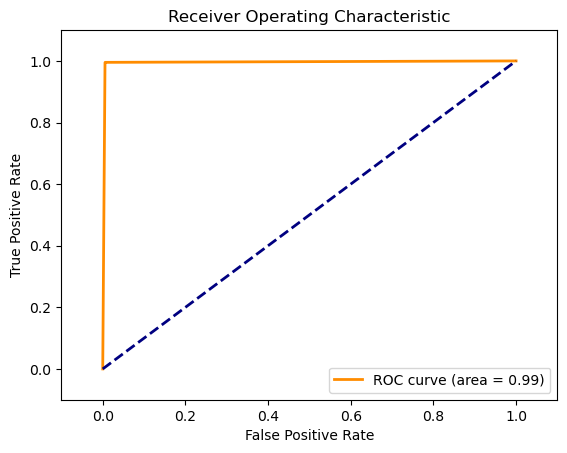

In [8]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, dt_model.predict_proba(X_test)[:,1])
roc_auc_value = auc(fpr, tpr)  # Renamed the variable to avoid naming conflict

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_value))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Extra Tree (Extremely Randomized Trees)

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss, confusion_matrix

# Step 1: Load the dataset
file_path = DATA
df = pd.read_csv(file_path)

# Step 2: Prepare the data
X = df.drop('outcome', axis=1)
y = df['outcome']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create and train the Extra Trees model
et_model = ExtraTreesClassifier(n_estimators=100, random_state=42)
et_model.fit(X_train, y_train)

# Step 5: Make predictions on the test data
y_pred = et_model.predict(X_test)

# Step 6: Evaluate the model's performance on the test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Step 7: Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

## logloss and auc
auc = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, et_model.predict_proba(X_test))
print("AUC: {:.4f}".format(auc))
print("Log Loss: {:.4f}".format(logloss))

import joblib
# Save the trained classifier model to a file
model_filename = MODEL_ET
joblib.dump(et_model, model_filename)


Accuracy: 0.9949165095610019
Confusion Matrix:
[[15396    54]
 [   97 14157]]
AUC: 0.9948
Log Loss: 0.0487


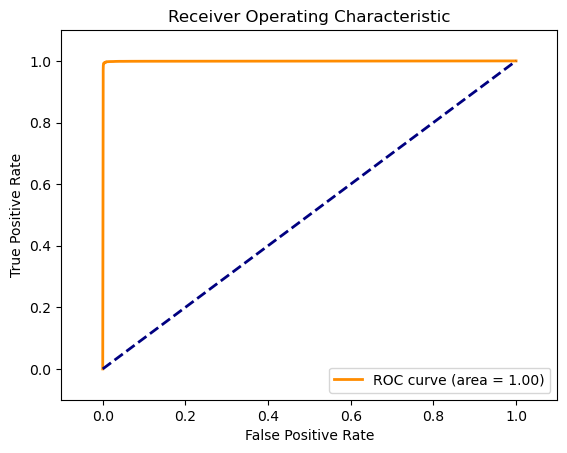

In [10]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, et_model.predict_proba(X_test)[:,1])
roc_auc_value = auc(fpr, tpr)  # Renamed the variable to avoid naming conflict

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_value))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Adaboost

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss, confusion_matrix

# Step 1: Load the dataset
file_path = DATA
df = pd.read_csv(file_path)

# Step 2: Prepare the data
X = df.drop('outcome', axis=1)
y = df['outcome']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create and train the AdaBoost model
base_model = DecisionTreeClassifier(max_depth=1)  # Weak learner (e.g., decision tree with max_depth=1)
adaboost_model = AdaBoostClassifier(base_estimator=base_model, n_estimators=50, random_state=42)
adaboost_model.fit(X_train, y_train)

# Step 5: Make predictions on the test data
y_pred = adaboost_model.predict(X_test)

# Step 6: Evaluate the model's performance on the test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Step 7: Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

## logloss and auc
auc = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, adaboost_model.predict_proba(X_test))
print("AUC: {:.4f}".format(auc))
print("Log Loss: {:.4f}".format(logloss))

import joblib
# Save the trained classifier model to a file
model_filename = MODEL_AdaB
joblib.dump(adaboost_model, model_filename)


Accuracy: 0.9717209803393483
Confusion Matrix:
[[15106   344]
 [  496 13758]]
AUC: 0.9715
Log Loss: 0.6275


NameError: name 'MODEL_AdaB' is not defined

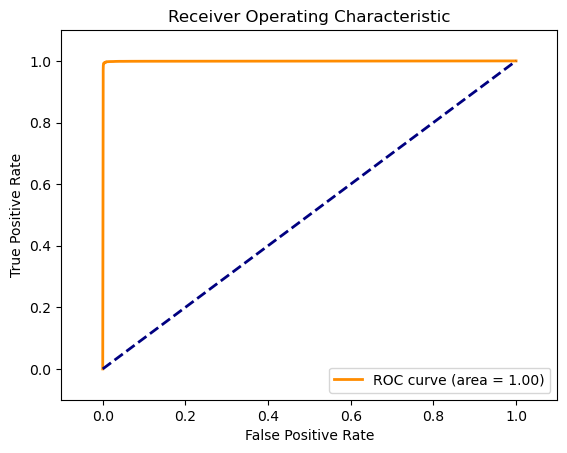

In [12]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, et_model.predict_proba(X_test)[:,1])
roc_auc_value = auc(fpr, tpr)  # Renamed the variable to avoid naming conflict

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_value))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Neural Network

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss, confusion_matrix

# Step 1: Load the dataset
file_path = DATA
df = pd.read_csv(file_path)

# Step 2: Prepare the data
X = df.drop('outcome', axis=1)
y = df['outcome']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Step 5: Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 6: Train the model on the training data
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Step 7: Make predictions on the test data
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob >= 0.5).astype(int)

# Step 8: Evaluate the model's performance on the test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Step 9: Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

## logloss and auc
auc = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, model.predict_proba(X_test))
print("AUC: {:.4f}".format(auc))
print("Log Loss: {:.4f}".format(logloss))

# import joblib
# # Save the trained classifier model to a file
# model_filename = MODEL_NN
# joblib.dump(model, model_filename)

Epoch 1/10
3713/3713 [==============================] - 8s 2ms/step - loss: 1650.5870 - accuracy: 0.9017 - val_loss: 88.4376 - val_accuracy: 0.9452
Epoch 2/10
3713/3713 [==============================] - 7s 2ms/step - loss: 1038.4470 - accuracy: 0.9053 - val_loss: 3689.5928 - val_accuracy: 0.8575
Epoch 3/10
3713/3713 [==============================] - 8s 2ms/step - loss: 1893.8290 - accuracy: 0.8973 - val_loss: 294.0559 - val_accuracy: 0.8994
Epoch 4/10
3713/3713 [==============================] - 7s 2ms/step - loss: 1514.8436 - accuracy: 0.9057 - val_loss: 749.0204 - val_accuracy: 0.8670
Epoch 5/10
3713/3713 [==============================] - 7s 2ms/step - loss: 2050.5022 - accuracy: 0.9108 - val_loss: 1716.6176 - val_accuracy: 0.9048
Epoch 6/10
3713/3713 [==============================] - 7s 2ms/step - loss: 1023.1818 - accuracy: 0.9244 - val_loss: 68.7383 - val_accuracy: 0.9302
Epoch 7/10
3713/3713 [==============================] - 7s 2ms/step - loss: 1472.0513 - accuracy: 0.9229 -

AttributeError: 'Sequential' object has no attribute 'predict_proba'

Confusion Matrix:
[[14473   977]
 [ 1049 13205]]
929/929 [==============================] - 1s 1ms/step
AUC: 0.9316
Log Loss: nan
 92/929 [=>............................] - ETA: 0s

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2442: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2442: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)


929/929 [==============================] - 1s 1ms/step


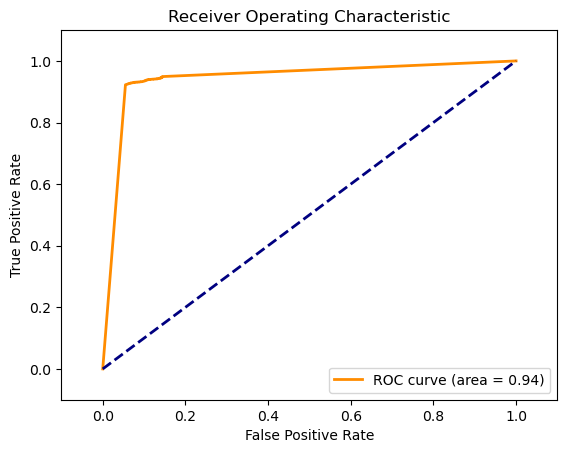

In [14]:
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
# Step 7: Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

## logloss and auc
auc_score = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, model.predict(X_test))
print("AUC: {:.4f}".format(auc_score))
print("Log Loss: {:.4f}".format(logloss))

# Plot ROC Curve for Neural Network Model
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc_value = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_value))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [16]:
probs = model.predict(X_test)

# Calculate log loss
log_loss_score = log_loss(y_test, probs)

print("Log Loss:", log_loss_score)

929/929 [==============================] - 1s 2ms/step
Log Loss: nan


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2442: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2442: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)


In [17]:
print("AUC: {:.4f}".format(auc))

AUC: 0.9231


# Ensemble Voting Method

Confusion Matrix:
[[15390    60]
 [   89 14165]]
Accuracy: 0.9950
AUC: 0.99493632
Log Loss: 0.0171


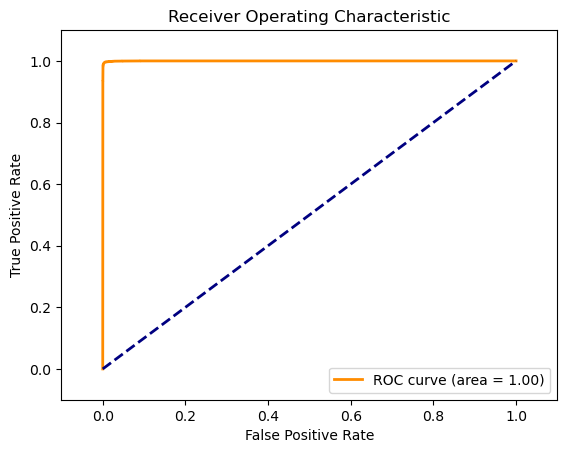

In [19]:
import pandas as pd
import numpy as np
import pickle
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss, confusion_matrix
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, matthews_corrcoef, log_loss, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import time
import joblib

def plot_roc_curve(y_true, y_scores):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

def load_models(model_paths):
    models = []
    for path in model_paths:
        model = joblib.load(path)
        models.append(model)
    return models

def ensemble_voting(models, data):
    predictions = []
    for model in models:
        prediction = model.predict(data)
        predictions.append(prediction.astype(int))  # Convert predictions to integers
    final_predictions = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=predictions)
    return final_predictions

def main(dataset_path, model_paths):
    # Load the dataset
    dataset = pd.read_csv(dataset_path)

    # Extract features (X) and labels (y)
    X = dataset.drop('outcome', axis=1)  
    y = dataset['outcome']  

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Load the ensemble models
    models = load_models(model_paths)

    # Make predictions using ensemble voting on the test set
    final_predictions = ensemble_voting(models, X_test)

    # Generate the confusion matrix
    cm = confusion_matrix(y_test, final_predictions)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test, final_predictions)
    
    # Calculate the AUC
    auc = roc_auc_score(y_test, final_predictions)

    # Calculate the log loss using one of the models (assuming they have similar outputs)
    logloss = log_loss(y_test, models[0].predict_proba(X_test))
    
    # Print the confusion matrix
    print("Confusion Matrix:")
    print(cm)
    print("Accuracy: {:.4f}".format(accuracy))
    print("AUC: {:.8f}".format(auc))
    print("Log Loss: {:.4f}".format(logloss))
    
    # Calculate the predicted probabilities for ensemble voting
    ensemble_probs = np.mean([model.predict_proba(X_test) for model in models], axis=0)

    # Plot the ROC curve for ensemble predictions
    plot_roc_curve(y_test, ensemble_probs[:, 1])

if __name__ == "__main__":
    dataset_path = DATA  # Replace with the actual path to your dataset
    model_paths = [MODEL_RF,MODEL_DT, MODEL_ET, MODEL_AdaB, MODEL_GB] # Replace with the paths to your .pkl models
    main(dataset_path, model_paths)

## Decision Tree

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load train and test CSV files
train_data = pd.read_csv(TRAIN_20)
test_data = pd.read_csv(TEST_20)

# Separate features (X) from the label column (y) for train and test datasets
X_train = train_data.drop('outcome', axis=1)
y_train = train_data['outcome']

X_test = test_data.drop('outcome', axis=1)
y_test = test_data['outcome']

# Step 4: Create and train the Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = tree_model.predict(X_test)

# Step 6: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Step 7: Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)



Accuracy: 0.48256742370475514
Confusion Matrix:
[[4400 8433]
 [3232 6479]]


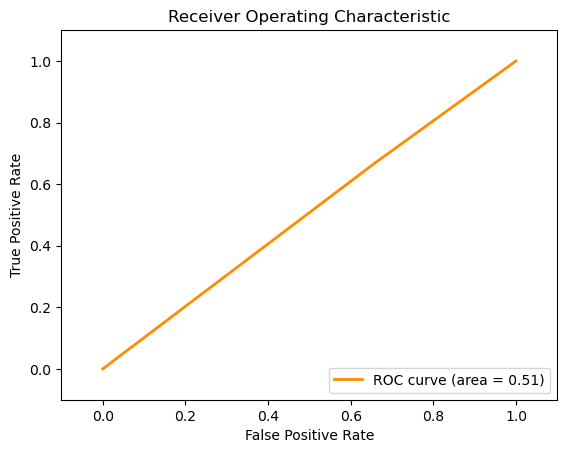

In [55]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, tree_model.predict_proba(X_test)[:,1])
roc_auc_value = auc(fpr, tpr)  # Renamed the variable to avoid naming conflict

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_value))
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [56]:
# Calculate log loss
logloss = log_loss(y_test, y_pred)

print(f'Log Loss: {logloss:.4f}')

Log Loss: 17.8718


## Random Forest

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load train and test CSV files
train_data = pd.read_csv(TRAIN_20)
test_data = pd.read_csv(TEST_20)

# Separate features (X) from the label column (y) for train and test datasets
X_train = train_data.drop('outcome', axis=1)
y_train = train_data['outcome']

X_test = test_data.drop('outcome', axis=1)
y_test = test_data['outcome']

# Step 4: Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=2, 
                                  random_state=42,
                                  max_depth=None,
                                  min_samples_split=2,
                                  min_samples_leaf=10,
                                  max_features=None,
                                  verbose=0)
rf_model.fit(X_train, y_train)
# Worst Hyperparameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 2}

# Step 5: Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Step 6: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Step 7: Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.4820351312987935
Confusion Matrix:
[[4461 8372]
 [3305 6406]]


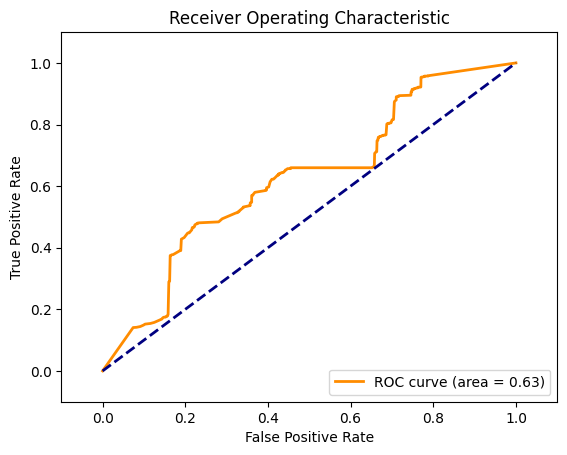

In [3]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
roc_auc_value = auc(fpr, tpr)  # Renamed the variable to avoid naming conflict

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_value))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [4]:
# Calculate log loss
logloss = log_loss(y_test, y_pred)

print(f'Log Loss: {logloss:.4f}')

NameError: name 'log_loss' is not defined

### KNN

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load train and test CSV files
train_data = pd.read_csv(TRAIN_20)
test_data = pd.read_csv(TEST_20)

# Separate features (X) from the label column (y) for train and test datasets
X_train = train_data.drop('outcome', axis=1)
y_train = train_data['outcome']

X_test = test_data.drop('outcome', axis=1)
y_test = test_data['outcome']

# Step 4: Create and train the k-Nearest Neighbors (KNN) model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors as needed
knn_model.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Step 6: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Step 7: Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.6224272533711852
Confusion Matrix:
[[7580 5253]
 [3259 6452]]


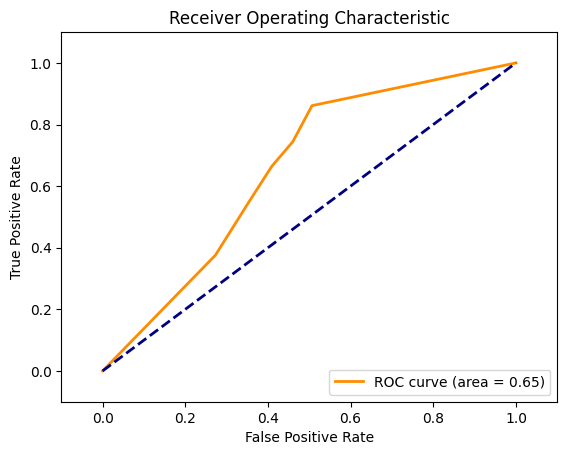

In [8]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, knn_model.predict_proba(X_test)[:,1])
roc_auc_value = auc(fpr, tpr)  # Renamed the variable to avoid naming conflict

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_value))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [7]:
# Calculate log loss
logloss = log_loss(y_test, y_pred)

print(f'Log Loss: {logloss:.4f}')

NameError: name 'log_loss' is not defined